In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [6]:
data=pd.read_csv('water.csv')

<Axes: xlabel='hardness', ylabel='mortality'>

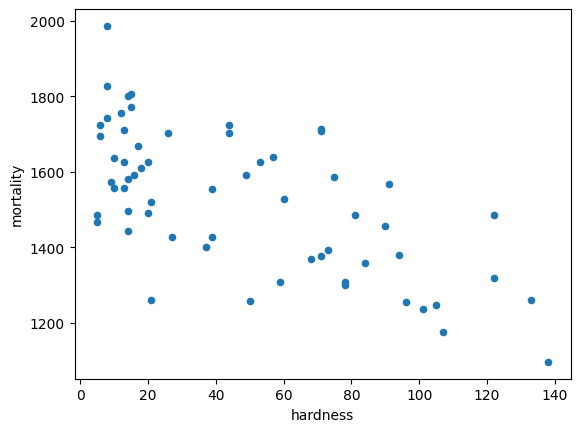

In [7]:
data.plot(kind='scatter', x='hardness', y='mortality')

In [8]:
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [9]:
data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [10]:
X=data['hardness']

In [11]:
y=data['mortality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
X_const = sm.add_constant(X_train)

In [14]:
X_const

,const,hardness
4,1.0,18
44,1.0,49
19,1.0,21
47,1.0,68
52,1.0,57
25,1.0,138
57,1.0,53
15,1.0,20
58,1.0,122
27,1.0,37


In [15]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           7.83e-06
Time:                        19:58:15   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [16]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912278


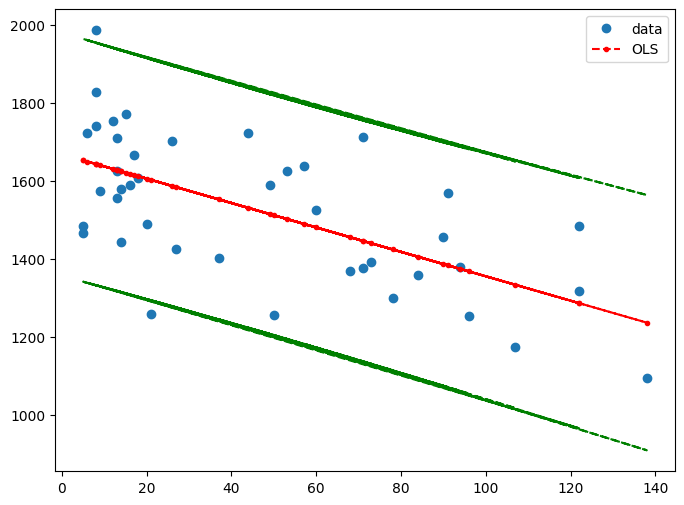

In [17]:
prstd, iv_l, iv_u = wls_prediction_std(results)
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

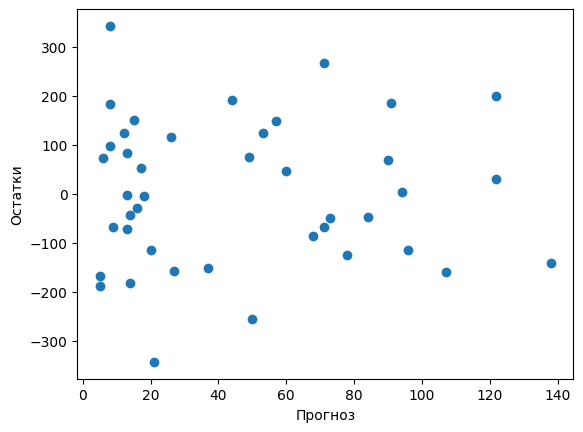

In [18]:
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

(array([1., 0., 1., 0., 2., 5., 3., 2., 5., 3., 2., 2., 5., 3., 2., 4., 0.,
        1., 0., 1.]),
 array([-3.43207209e+02, -3.08892795e+02, -2.74578382e+02, -2.40263968e+02,
        -2.05949554e+02, -1.71635140e+02, -1.37320726e+02, -1.03006312e+02,
        -6.86918979e+01, -3.43774840e+01, -6.30700817e-02,  3.42513439e+01,
         6.85657578e+01,  1.02880172e+02,  1.37194586e+02,  1.71509000e+02,
         2.05823414e+02,  2.40137827e+02,  2.74452241e+02,  3.08766655e+02,
         3.43081069e+02]),
 <BarContainer object of 20 artists>)

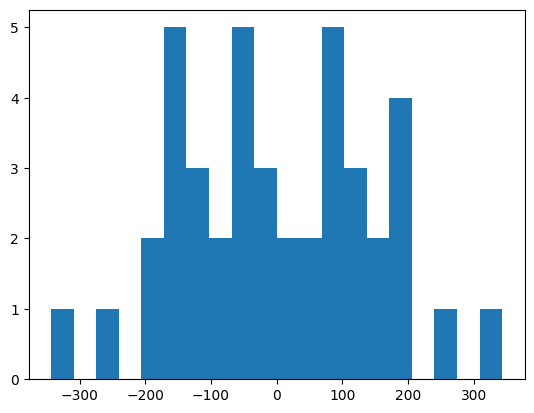

In [19]:
plt.hist(results.resid, bins=20)

In [20]:
model = LinearRegression()

In [21]:
X_train=X_train.to_numpy()

In [22]:
X_train=X_train.reshape(-1,1)

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
X_test=X_test.to_numpy()

In [25]:
X_test=X_test.reshape(-1,1)

In [26]:
model.score(X_test, y_test)

0.5046490611017092